# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 3</font>

***

# <font color=green>1. DESCRIPCIÓN Y LECTURA DE LOS DATOS</font>
***

**Encuesta Nacional de Hogares -- 2015**


La <b> Encuesta Nacional de Hogares (PNDA, del portugués Pesquisa Nacional por Amostra de Domicílios)</b> anualmente investiga, de forma permanente, las características generales de la población, educación, trabajo, ingresos y vivienda, y otras con frecuencia variable, de acuerdo con las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, **un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y a la mejora de las condiciones de vida en Brasil**.

### **Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Cargar el dataset en un DataFrame
4. Consultar información sobre las variables del Dataframe
5. Preprocesamiento:
    - Eliminar variables innecesarias o que no permitan leer el dataframe
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
    - Normalizar los valores de todas las variables
6. Ejemplo básico de entrenamiento de un modelo
    - Definir los feactures
    - Elegimos el modelo
    - Probamos el modelo
    - Probamos la exactitud del modelo
    - Calculamos taza de aciertos
7. Entrenamiento de modelo con muestras de pruebas proporcionales
    - Estratificación proporcional de las muestras de entrada
8. Estimador lineal para un dataset de cumplimento de entrega de proyectos
9. Estimador no lineal
10. Dummy classifiers y Árboles de decisión
    - El clasificador Dummy
    - Arbol de decisión con y sin datos estandarizados
    - Diagrama de árbol de decisión y sus parámetros

### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**

In [23]:
# Las versiones de las bibliotecas que usaremos son las siguientes:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn



print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


### **3. Cargar el dataset en un dataframe**

In [24]:
ruta= '/content/drive/MyDrive/Colab Notebooks/231117-1_estadistica_python_test_hipotesis/datasets/datos.csv'
datos_jefes_hogares_df = pd.read_csv(ruta)

### **4. Consultar información sobre las variables del Dataframe**

In [25]:
datos_jefes_hogares_df.head()

,UF,Sexo,Edad,Color,Anos de Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Fuente


https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=microdados


## Variables


> ### Renta
> ***

Ingreso mensual del jefe del hogar.

> ### Edad
> ***

Edad (en años) del jefe del hogar.

> ### Altura (construida)
> ***

Altura (en metros) del jefe del hogar.

> ### UF (Unidad de federación)
> ***

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin instrucción o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinados|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indigena|
|2|Blanca|
|4|Negra|
|6|Amarilla|
|8|Parda|
|9|Sin declaración|

<font color='red'>Observación</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que la <b>Renta</b> no era válida (999 999 999 999);
> 2. Se eliminaron los registros en los que la <b>Renta</b> era missing;
> 3. Sólo se consideraron los registros de las  <b>personas de referencia</b> de cada hogar (responsables del hogar).

## Importando Bibliotecas y leyendo la base de datos

https://pandas.pydata.org/

## Algunas preguntas que pueden ser de interés
> 1. ¿La variable altura se distribuye como una normal?
> 2. ¿Los jefes del hogar tienen en promedio 1,70 cm de altura?
> 3. ¿Las mujeres ganan menos que los hombres?

# <font color=green>2. PRUEBA DE HIPÓTESIS</font>

***

Una prueba de hipótesis estadística es un procedimiento que permite decidir entre dos hipótesis opuestas: <b>Hipótesis nula</b> $(H_0)$  y la <b>Hipótesis alterna</b> $(H_1)$, las cuales conjeturan sobre alguna caraterística desconocida de la población de interés.

Para realizar este procedimiento se retira una muestra aleatoria de la población bajo estudio y con base en las evidencias de esa muestra se toma la decisión de rechazar o no rechazar $H_0$.<font color='red'> Note que la decisión es sobre $H_0$</font>!


## **Entendiendo $H_0$ y $H_1$**
Considere que hay una persona que está siendo juzgada.




$H_0$:  La persona es **inocente**.

$H_1$: La persona es **culpable**.


## **Errores Inferenciales**

Un proceso inferencial siempre se encuentra sujeto a errores.





 <b>Error Tipo I</b>: Rechazar $H_0$ siendo $H_0$ verdadera.

> *Ejemplo: La persona es condenada a pesar de que realmente es inocente*.



 <b>Error Tipo II</b>: No rechazar $H_0$ siendo $H_0$ falsa.

>*Ejemplo: La persona es absuelta a pesar de ser culpable*.




<b>Notación de los errores </b>

P(Error Tipo I) = $\alpha$  (<b>Nivel de significancia </b>)

P(Error Tipo II) = $\beta$, (siendo $1-\beta$ la <b>Potencia</b> )


El objetivo principal es proponer algún procedimiento de prueba de hipótesis que minimice los dos errores. Sin embargo, **en la práctica, solo se controla el error de tipo I** y generalmente su probabilidad es fijada en 0,05 o 0,01.

## **Criterio para decidir si se rechaza o no $H_0$**




<b>Región Crítica</b>: Valores de la **estadística de prueba** que conllevan al rechazo de $H_0$.

<b>$p$-valor</b>: Menor nivel de significancia con el cuál rechazamos $H_0$ siendo aplicado después que el experimento fue realizado.
>- Si $p$-valor $\leq \alpha$ rechazamos $H_0$.

>- Si $p$-valor $> \alpha$ no rechazamos $H_0$.


## <font color=green>2.1 Prueba de normalidad </font>

***


¿La variable altura se distribuye como una normal?



**Es una prueba que nos permite determinar si un conjunto de datos proviene o no de una distribución normal.**

Hipótesis de interés

$H_0$:  La muestra proviene de una distribución normal.

$H_1$: La muestra no proviene de una distribución normal.

**Importando biblioteca**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [ ]:
from scipy import stats

La función **normaltest** prueba la hipótesis nula $H_0$ de que la muestra proviene de una distribución normal.

<font color='red'>Rechazamos $H_0$ si el $p$-valor $\leq \alpha$.</font>


Fijando el nivel de significancia $(\alpha)$

In [ ]:
significancia = 0.05

### **Probando normalidad en la variable Renta**

**Inspección visual**

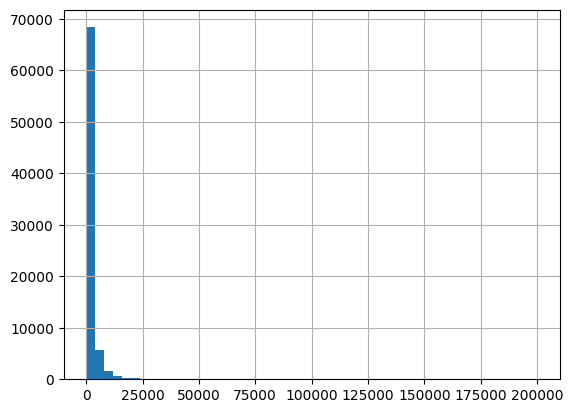

In [ ]:
datos_jefes_hogares_df.Renta.hist(bins = 50);

**Establecemos las hipótesis**

$H_0$:  La muestra de la renta de los jefes del hogar proviene de una distribución normal.

$H_1$: La muestra de la renta de los jefes del hogar no proviene de una distribución normal.



In [ ]:
res = stats.normaltest(datos_jefes_hogares_df.Renta)
stats_test, p_valor = res

In [ ]:
print(f'La estadística de prueba es {stats_test.round(2)} y el valor p es {p_valor.round(2)}')

La estadística de prueba es 152380.76 y el valor p es 0.0


<font color='red'> Rechazamos $H_0$ si el $p$-valor $\leq \alpha$ </font>

In [ ]:
p_valor <= significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto tenemos suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='blue'>**Conclusión:** Con un nivel de significancia del 5% podemos concluir que la muestra de la renta de los jefes del hogar NO proviene de una distribución normal.</font>

### **Probando normalidad en la variable Altura**

**Inspección visual**

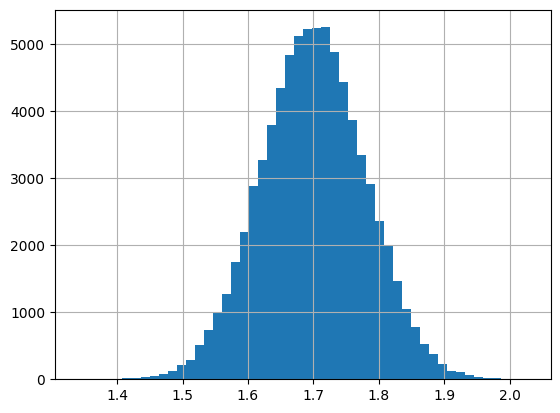

In [ ]:
datos_jefes_hogares_df.Altura.hist(bins = 50);

**Establecemos las hipótesis**

$H_0$:  La muestra de la altura de los jefes del hogar proviene de una distribución normal.

$H_1$: La muestra de la altura de los jefes del hogar no proviene de una distribución normal.

In [ ]:
res = stats.normaltest(datos_jefes_hogares_df.Altura)
stats_test, p_valor = res

In [ ]:
print(f'La estadística de prueba es {stats_test.round(2)} y el valor p es {p_valor.round(2)}')

La estadística de prueba es 0.2 y el valor p es 0.9


<font color='red'> Rechazamos $H_0$ si el $p$-valor $\leq \alpha$ </font>

In [ ]:
p_valor <= significancia

False

Observe que <font color='red'>$p-\textrm{valor} > \alpha$</font>, por lo tanto NO tenemos suficiente evidencia en la muestra para rechazar $H_0$.

<font color='blue'>**Conclusión:** Con un nivel de significancia del 5% concluimos que la muestra de la altura de los jefes del hogar proviene de una distribución normal.</font>

## <font color=green>2.2 Pruebas de hipótesis para  parámetros </font>

***

¿Los jefes del hogar tienen una **altura promedio** de 1,70 cm?

**Observe que el parámetro de interés es la média $(\mu)$**

### **Conceptos importantes**

> <b>Estadística de prueba</b>: Es una estadística o variable aleatoria que se deriva del estimador puntual del parámetro de interés. En ella se comparan la hipótesis postulada y los datos observados.

> <b> Región Crítica </b>: Los valores de la estadística de prueba que conllevan al rechazo de $H_0$.


### **Etapas básicas de una prueba**

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**;

 <font color='red'>Puntos importantes</font>
> 1. **La afirmación o declaración sobre el parámetro poblacional** $(\mu)$ y que en general es vinculada a un valor de referencia, o a una especificación estándar o histórica, debe ser formulada como **la hipótesis nula** $H_0$.
> 2. De manera general, la afirmación sobre el parámetro poblacional $(\mu)$ que **sospechamos que es verdadera**, debe ser formulada como **hipótesis alterna** $H_1$.
> 3. Se pueden plantear las siguientes pruebas de hipótesis:

> - Prueba de hipótesis <font color='red'>bilateral</b></font>
$$
\begin{cases}
H_0: \mu = \mu_0   \\
H_1: \mu \neq  \mu_0
\end{cases}
$$

>- Prueba de hipótesis <font color='red'>unilateral a derecha</font>
$$
\begin{cases}
H_0: \mu \leq \mu_0   \\
H_1: \mu > \mu_0
\end{cases}
$$

> - Prueba de hipótesis <font color='red'>unilateral a izquierda</font>
$$
\begin{cases}
H_0: \mu \geq \mu_0   \\
H_1: \mu < \mu_0
\end{cases}
$$

> 4. En una prueba de hipótesis bilateral, la región de no rechazo corresponde a un intervalo de confianza para el parámetro de interés.

**Paso 2: Fijar el nivel de significancia $(\alpha)$ de la prueba**

<font color='red'>Puntos importantes</font>
> 1. El nivel de significancia $(\alpha)$ es el tamaño de la región de rechazo.
> 2. Los valores más frecuentes usados para $\alpha$ son $1\%$, $5\%$ y $10\%$
> 3. El complemento de la región de rechazo $(1-\alpha)$ corresponde al nivel de confianza.




![Nivel de Significancia](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Nivel_Significancia_mu.png)

**Paso 3: Determinar la distribución de muestreo y Estadística de Prueba adecuada**

<font color='red'>Puntos importantes</font>
> 1. Si la muestra aleatoria proviene de una **distribución normal con varianza conocida** $(\sigma^2)$, la estadística de prueba es
$$ Z = \frac{\overline{X} - \mu_0}{\sigma/\sqrt{n}}  \sim N(0,1),$$
siendo $\overline{X}$ la media muestra, $\mu_0$ un valor de referencia.
> 2. Si la muestra aleatoria proviene de una **distribución normal con varianza desconocida** $(\sigma^2)$, la estadística de prueba es
$$ T = \frac{\overline{X} - \mu_0}{S/\sqrt{n}}  \sim t(n-1),$$
donde $n-1$ son los grados de libertad de la distribución t-Student.
> 3. Si no sabemos de que distribución proviene la muestra, pero $n$ es suficientemente grande $(n\geq 30)$ podemos utilizar una de las estadística anteriores, conforme lo establece el teorema del límite central (TLC)
> 4. Si no sabemos de que distribución proviene la muestra y $n$ es pequeño $(n<30)$ debemos aumentar el tamaño de la muestra o usar pruebas no paramétricas.






<font color ='red'> Resumen </font>

![Resumen una media](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Resumen_mu.png)

**Paso 4: Determinar la Región crítica.**

<font color='red'>Puntos importantes</font>
> 1. La localización de la región crítica depende de la forma de la hipótesis alterna $(H_1)$.
> 2. Si $H_1: \mu \neq \mu_0$, la región crítica se divide en las dos colas de la distribución de la estadística de prueba, o sea que una parte estará en la cola derecha y la otra en la cola izquierda.
> 3. Si $H_1: \mu > \mu_0$, la región crítica se encuentra en la cola derecha de la distribución de la estadística de prueba.  
> 4.  Si $H_1: \mu < \mu_0$, la región crítica se encuentra en la cola izquierda de la distribución de la estadística de prueba.



![Region Critica una media](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_mu.png)

**Paso 5: Tomar la Decisión y Concluir**

<font color='red'>Puntos importantes</font>

Podemos decidir si rechazamos o no $H_0$ usando dos criterios:
> 1. Si la Estadística de prueba $(Z \, \textrm{o}\, T)$  cae en la región de rechazo, entonces rechazamos $H_0$.
> 2. Si $p$-valor $\leq \alpha$ rechazamos $H_0$. El cálculo del $p$-valor está ligado al tipo de hipótesis.  Asumiendo que $W$ es una estadística de prueba ($Z$ o $T$) cualquiera, tenemos que
>- Prueba <font color='red'>bilateral $(H_1: \mu \neq \mu_0)$</font>

$$p-\textrm{valor}= 2\times P(W \geq Z) = 2\times [1-P(W < Z) ] $$.

>- Prueba <font color='red'>Unilateral a derecha $(H_1: \mu > \mu_0)$</font>

$$p-\textrm{valor}= P(W \geq Z)= 1-P(W < Z)$$

>- Prueba <font color='red'>Unilateral a izquierda $(H_1: \mu < \mu_0)$</font>

$$p-\textrm{valor}= P(W \leq Z)$$.


**Importante en esta sección:**

- Ejecutar una prueba de normalidad usando las herramientas de la biblioteca Scipy.
- Los cinco pasos principales para desarrollar una prueba de hipótesis.

# <font color=green>3. PRUEBA DE HIPÓTESIS PARA UNA MEDIA </font>
***

## <font color=green>3.1 Prueba Bilateral</font>
***

### **Problema**

Una máquina que llena **paquetes de café** estaba regulada para llenarlos con un **peso medio de $500 \,g$**.  Después de un tiempo de uso, la máquina se ha desregulado y se desea saber cuál es el **peso medio actual** $\mu$ con el que la máquina llena los paquetes de café. Cuando el volumen medio cae debajo de $500 \,g$ la empresa se preocupa en perder ventas y tener problemas con los organos fiscalizadores. Por otro lado, cuando el valumen pasa los $500 \,g$ la empresa empieza a preocuparse con pérdidas en el proceso de producción.

El sector de control de calidad de la empresa, extrae periodicamente **muestras de 50 paquetes** para monitorear el proceso de producción. Para cada muestra, realiza una **prueba de hipótesis** para evaluar si la máquina se desajustó. En todos los casos, el equipo de control de calidad asumió un **nivel de significancia del 5%**.

Suponga que una muestra **muestra de 50 paquetes** tuvo un peso promedio de $503.24 \, g$. ¿Es este valor medio muestral suficientemente mayor que $500 \, g$ para hacernos rechazar la hipótesis de que el promedio del proceso es $500 \, g$ al **nivel de significancia del 5%**?

Asuma que el peso de los paquetes que llena la máquina se distribuye normalmente con una desviacion estándar de $4.5 \, g$.

Si denotamos por \\
<font color='blue'>$\mu$</font> $\Rightarrow$ el peso medio de los paquetes de cafe. \\
<font color='red'>$\mu_0$</font> $\Rightarrow$ el peso medio de referencia. \\

las hipótesis que queremos probar son \\
$
\begin{cases}
H_0: \mu = 500\\
H_1: \mu \neq 500
\end{cases}
$

observe que <font color='red'>$\mu_0 = 500$.</font>

***


**Datos del problema**

In [ ]:
muestra_Cafe = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505,
                501, 505, 510, 505, 504, 497, 506, 506, 508, 505,
                497, 504, 500, 498, 506, 496, 508, 497, 503, 501,
                503, 506, 499, 498, 509, 507, 503, 499, 509, 495,
                502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [ ]:
import pandas as pd

In [ ]:
muestra_Cafe = pd.DataFrame(muestra_Cafe,columns=["muestra_Cafe"])
muestra_Cafe.head()

,muestra_Cafe
0,509
1,505
2,495
3,510
4,496


In [ ]:
desviacion = 4.5
mu_0 = 500
n = 50
media_muestral = 503.24
significancia = 0.05
confianza = 1 - significancia

#### <b> Haciendo cálculos </b>

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**

$\mu\Rightarrow$ el peso medio de los paquetes de cafe.


$
\begin{cases}
H_0: \mu = 500   \\
H_1: \mu \neq 500
\end{cases}
$

En este caso tenemos que $\mu_0 = 500 $

  

**Paso 2: Fijar el nivel de significancia $\alpha$ de la prueba**

$\alpha = 0.05$

**Paso 3: Determinar la distribución de muestreo y Estadística de Prueba adecuada**

![Resumen una media](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Resumen_mu.png)

Como la muestra es normal y $\sigma$ es conocido, **la estadística de prueba adecuada** es
$$Z=\frac{\overline{X} - \mu_0}{\sigma/\sqrt{n}}$$

Sabemos  que $Z$ se distribuye aproximadamente como una normal estándar.

In [ ]:
import numpy as np

In [ ]:
Z = (media_muestral - mu_0)/(desviacion/np.sqrt(n))
Z

5.091168824543157

**Paso 4: Determinar la región crítica**

![Region Critica Bilateral](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Bilateral.png)

Obteniendo $z_{\alpha/2}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
from scipy.stats import norm

In [ ]:
z_alpha_2 = norm.ppf(0.975)
z_alpha_2

1.959963984540054

Por lo tanto, la Región Crítica es como sigue


![Valor Critico Bilateral](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Valor_Critico_Bilateral.png)

**Paso 5: Tomar la decisión y concluir**

<font color='red'>¿$Z = 5,09$ está en la Región Crítica?</font> o equivalentemente <font color='red'>¿ $Z \leq -1,96$ ou $Z \geq 1,96$?</font>




In [ ]:
Z >= z_alpha_2

True

Observe que <font color='red'>$Z \geq 1,96$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

![Decision Cafe](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Decision_Cafe.png)

<font color='red'>Rechazamos $H_0$ si $p$-valor $\leq \alpha$.</font>



Recordemos que cuando la prueba es bilateral $(H_1: \mu \neq 500)$ el $p$-valor se calcula como

$$p-\textrm{valor}= 2\times P(W \geq Z) = 2\times [1-P(W < Z)]$$.

In [ ]:
p_valor = 2*(norm.sf(Z))
p_valor

3.558629930076567e-07

In [ ]:
p_valor = 2*(1-norm.cdf(Z))
p_valor

3.5586299307333036e-07

In [ ]:
p_valor <= significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='blue'>**Conclusión:** Se sechaza la hipótesis nula $H_0$ de que la máquina llena los paquetes de café con un peso promedio de $500\, g$. Entonces, deben tomarse medidas para ajustar la máquina.</font>

**Problema:**

Un fabricante de harina afirma que la cantidad promedio de harina en el empaque de su producto principal es de 500 g. Una prueba de pesaje en 30 paquetes muestreados al azar mostró un peso promedio igual a 501 g. Estudios previos afirman que la distribución del peso sigue una normal con una desviación estándar de 20 g. Considerando un nivel de significancia del 5%, responda las siguientes preguntas.

1) ¿Cuál es la hipótesis nula que se va a probar?

2) ¿Cuál es el valor de la estadística de prueba?

3) ¿Cuál es la conclusión de la prueba?

In [ ]:
from scipy.stats import norm
import numpy as np
media_muestral = 501
desviacion = 20
mu_0 = 500
significancia = 0.05
confianza = 1 - significancia
n = 30
Z = (media_muestral -  mu_0)/(desviacion/np.sqrt(n))
z_alpha_2 = norm.ppf(0.975)
print('Z =', round(Z, 4))
if(Z<= -z_alpha_2 or Z >= z_alpha_2):
  print('Rechazar H0')
else:
  print('No rechazar H0')

Z = 0.2739
No rechazar H0


**Respuestas:**

1) $H_0:\mu$ = 500

2) Z = 0,27$

3) No rechace $H_0$

#### <b>Usando biblioteca de Phyton </b>
  

<font color='red'>Usando ztest</font>

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
ztest(x1=muestra_Cafe,value=mu_0,alternative='two-sided')

(array([5.10955978]), array([3.22910317e-07]))

In [ ]:
z, p_valor = ztest(x1=muestra_Cafe,value=mu_0,alternative='two-sided')
print(z[0])
print(p_valor[0])

5.109559775991873
3.229103172445771e-07


In [ ]:
p_valor[0] <= significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='red'>Usando DescrStatsW</font>

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test = DescrStatsW(muestra_Cafe)

In [ ]:
test.ztest_mean(value=mu_0,alternative='two-sided')

(array([5.10955978]), array([3.22910317e-07]))

In [ ]:
z,p_valor= test.ztest_mean(value=mu_0,alternative='two-sided')
print(z[0])
print(p_valor[0])

5.109559775991874
3.2291031724457596e-07


In [ ]:
p_valor[0] <= significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='blue'>**Conclusión:** Se sechaza la hipótesis nula $H_0$ de que la máquina llena los paquetes de café con un peso promedio de $500\, g$. Entonces, deben tomarse medidas para ajustar la máquina.</font>

### **Resumiendo**

![Bilateral](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Bilateral.png)

**Problema:**

Considere nuevamente los datos del ejercicio anterior. Un fabricante de harina afirma que la cantidad promedio de harina en los empaques de su producto principal es de 500 g. Una prueba de pesaje en 30 paquetes muestreados al azar mostró un peso promedio igual a 501 g.

Estudios previos afirman que la distribución del peso sigue una normal y que la desviación estándar de la población es igual a 20 g. Con un nivel de significancia del 5%, pruebe la hipótesis nula de que el promedio del proceso es igual a 500 g y marque la alternativa que indica el p-valor de la prueba aplicada (considere solo 3 lugares decimales).

In [ ]:
p_valor = 2*(1 - norm.cdf (Z))
print(p_valor.round(3))
# e
p_valor = 2*(norm.sf (Z))
print(p_valor.round(3))

0.784
0.784


**Importante en esta sección:**

- Aplicar una prueba paramétrica de dos colas (bicaudal o bilateral).
- Ejecutar los pasos de una prueba Z bilateral.
- Las reglas para decidir si rechazamos o no rechazamos una hipótesis nula.
- Comprender y a calcular el p-valor de una prueba de hipótesis.
- Aplicar una prueba Z bilateral usando herramientas de Python

## <font color=green>3.2 Prueba Unilateral</font>

### **Problema**

Una cadena de comidas rápidas que se dedica a vender únicamente snacks típicos de Colombia, **afirma que el tiempo medio para servir uno de esos snacks es de aproximadamente 12 minutos**. Una empresa que investiga casos de publicidad engañosa **sospecha que ese tiempo es mayor**. Con el fin de probar la afirmación de la cadena, la empresa selecciona aleatoriamente **una muestra de 100 snacks** en varios establecimientos de esta cadena y que sirven este tipo de productos, y mide el tiempo que demoran en servir cada uno.
**Asumiendo que esa población se distribuye aproximadamente como una normal** y considerando un **nivel de significancia del 5%** ¿qué se puede concluir sobre la declaración de la cadena?


Si denotamos por \\
<font color='blue'>$\mu$</font> $\Rightarrow$ el tiempo medio en servir uno snacks. \\
<font color='red'>$\mu_0$</font> $\Rightarrow$ el tiempo medio de referencia. \\

las hipótesis que queremos probar son \\

$
\begin{cases}
H_0: \mu = 12\\
H_1: \mu > 12
\end{cases}
$

observe que  <font color='red'>$\mu_0 = 12$.</font>

***

**Datos del problema**

In [ ]:
muestra_snacks = [21.99, 22.83, 12.82, 17.57, 13.22, 16.88, 12.52,  7.51, 12.03, 13.63,
                  15.82, 17.27, 11.04,  5.47, 17.55, 21.21, 13.40, 10.83, 12.24, 16.67,
                  10.81, 17.33, 11.10,  4.40,  6.22, 10.48, 16.96,  2.77, 19.80, 14.79,
                  15.64, 16.90, 14.89, 12.88, 15.80, 11.10,  6.81, 18.45, 20.11, 16.07,
                  14.90, 15.43, 19.16,  9.92, 20.56, 18.50, 13.32, 14.11, 27.95, 12.10,
                  16.74,  8.76, 16.94, 14.83,  6.62, 13.47, 14.04,  5.12, 13.45,  9.80,
                  12.21, 16.95, 16.72, 11.95,  8.82,  4.15,  8.35, 15.13, 12.90, 11.93,
                  14.79, 19.91, 12.75,  5.97,  5.08, 19.19, 10.82,  9.66, 16.52, 16.80,
                  16.22, 19.81, 18.40, 20.73,  5.87,  9.83, 16.72, 16.44, 25.38, 23.08,
                  3.43,  17.90,  8.56,  9.48, 11.36, 17.08, 12.81, 15.03, 20.50, 12.22]

In [ ]:
muestra_snacks = pd.DataFrame(muestra_snacks, columns=['muestra_snacks'])
muestra_snacks

,muestra_snacks
0,21.99
1,22.83
2,12.82
3,17.57
4,13.22
...,...
95,17.08
96,12.81
97,15.03
98,20.50


In [ ]:
mu_0 = 12
significancia = 0.05
confianza = 1 - significancia
n = 100

#### **Haciendo cálculos**

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**

$\mu\Rightarrow$ el tiempo medio en servir uno snacks.

$
\begin{cases}
H_0: \mu \leq 12   \\
H_1: \mu > 12
\end{cases}
$

En este caso tenemos:
>- Una prueba unilateral a derecha
>- El valor de referencia es  <font color='red'>$\mu_0 = 12 $</font>.



**Paso 2: Fijar el nivel de significancia $\alpha$ de la prueba**

$\alpha = 0,05$

**Paso 3: Determinar la distribución de muestreo y Estadística de prueba adecuada**

![Resumen una media](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Resumen_mu.png)

Como la muestra es normal y $\sigma$ es desconocido, **la estadística de prueba adecuada** es

$$T=\frac{\overline{X} - \mu_0}{S/\sqrt{n}}$$

Sabemos que $T$ se distribuye $t$-Student con $n-1$ grados de libertad.

In [ ]:
media_muestral = muestra_snacks.mean()[0]
media_muestral

13.9298

In [ ]:
desviacion_muestral = muestra_snacks.std()[0]
desviacion_muestral

5.01503496669482

In [ ]:
T = (media_muestral - mu_0)/(desviacion_muestral/np.sqrt(n))
T

3.8480290024215784

**Paso 4: Determinar la región crítica**

![Region Critica Snacks](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Snacks.png)

Obteniendo $t_\alpha$


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [ ]:
from scipy.stats import t as t_student

In [ ]:
grados_libertad = n-1

In [ ]:
t_alpha = t_student.ppf(confianza, grados_libertad)
t_alpha

1.6603911559963895

Por lo tanto, la Región Crítica es como sigue

![Valor Critico Snacks](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Valor_Critico_Snacks.png)

**Paso 5: Tomar la decisión y concluir**

<font color='red'>¿$T = 3,85$ está en la Región Crítica?</font> o equivalentemente <font color='red'> ¿ $T \geq 1,66$?</font>

In [ ]:
 T > t_alpha

True

Observe que <font color='red'>$T \geq 1,66$</font> y por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

![Decision Snacks](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Decision_Snacks.png)

<font color='red'>Rechazamos $H_0$ si $p$-valor $\leq \alpha$.</font>

Recordemos que cuando la prueba es unilateral a derecha $(H_1: \mu > 12)$ el $p$-valor se calcula como

$$p-\textrm{valor}= P(W \geq T) = 1-P(W < T)$$.

 o si $p-\textrm{valor}\leq \alpha$

In [ ]:
p_valor = t_student.sf(T,grados_libertad)
p_valor

0.00010549375091642149

In [ ]:
p_valor = 1- t_student.cdf(T,grados_libertad)
p_valor

0.00010549375091639668

In [ ]:
p_valor <= 0.05

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='blue'>**Conclusión:** Se rechaza la hipótesis nula $H_0$ de que la cadena de comidas rápidas demora en promedio 12 minutos en servir un snacks. Entonces,  la empresa confirma sus sospechas de propaganda engañosa.</font>

#### Usando biblioteca de Phyton

<font color='red'>Usando DescrStatsW</font>

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html



In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test = DescrStatsW(muestra_snacks)

In [ ]:
test.ttest_mean(value = mu_0,alternative = 'larger')

(array([3.848029]), array([0.00010549]), 99.0)

In [ ]:
t,p_valor, gl = test.ttest_mean(value = mu_0,alternative = 'larger')
print(p_valor[0])

0.00010549375091642149


In [ ]:
p_valor [0] <=0.05

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='blue'> **Conclusión:** Se rechaza la hipótesis nula $H_0$ de que la cadena de comidas rápidas demora en promedio 12 minutos en servir un snacks. Entonces,  la empresa confirma sus sospechas de propaganda engañosa.</font>

**Suponiendo que la única información distribucional que tenemos es que la desviación estándar poblacional es 6 minutos ¿ se mantendrá la misma conclusión de que la cadena está haciendo propaganda engañosa?**

<font color='red'> Tenga en cuenta que</font>
>- No podemos afirmar que la muestra proviene de una normal.
>- La desviación estándar poblacional $\sigma$ es conocida ($\sigma = 6$).
>- $n=100$ es grande.

![Resumen una media](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Resumen_mu.png)

<font color='red'>Usando DescrStatsW</font>

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html

In [ ]:
test = DescrStatsW(muestra_snacks)

In [ ]:
t,p_valor = test.ztest_mean(value = mu_0,alternative = 'larger')
print(p_valor[0])

5.953597980201217e-05


In [ ]:
p_valor[0] <= 0.05

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='red'>Note que los resultados son cercanos y que las conclusiones son las mismas. Esto sucede cuando $n$ es grande, pues la distribución $t$-Student queda muy próxima a la distribución normal</font>.

___

**Problema 1: Muestra de distribución normal y  σ  desconocido**

La empresa Limpia Residuos garantiza poder realizar el tratamiento de aguas residuales y obtener,como mínimo, 150 g de impurezas por cada mil litros de aguas residuales tratadas. Veinte muestras de mil litros de aguas residuales mostraron, en promedio, 153 g de impurezas y una desviación estándar igual a 90 g.

Suponiendo que la muestra de las aguas residuales sigue una distribución normal y asumiendo un nivel de significancia del 5% ¿sería posible estar en desacuerdo con la empresa Limpia Residuos?

In [ ]:
from scipy.stats import t as t_student
import numpy as np
media_muestral = 153
desviacion_muestral = 90
mu_0 = 150
significancia = 0.05
confianza = 1 - significancia
n = 20
grados_de_libertad = n - 1
T = (media_muestral - mu_0) / (desviacion_muestral / np.sqrt(n))
t_alpha = t_student.ppf(significancia, grados_de_libertad)
print('t(alpha) =', round(t_alpha, 4))
print('T =', round(T, 4))
if(T <= t_alpha):
  print('Rechazar H0')
else:
  print('No rechazar H0')

t(alpha) = -1.7291
T = 0.1491
No rechazar H0


**Solución:**

T = 0,1491

No rechazar $H_0$, es decir, la afirmación de la empresa es cierta.

____

**Problema 2: Se desconoce si la muestra es de distribución normal,  σ  es conocido**

La pizzería Quesillo afirma que la cantidad de queso en sus pizzas familiares es de al menos 350 g con una desviación de 80 g. Una muestra de 35 pizzas de tamaño familiar reveló un promedio de 330 g de queso por pizza.

Suponiendo un nivel de significancia del 5% ¿sería posible estar en desacuerdo con la afirmación de la pizzería?

In [ ]:
from scipy.stats import norm
import numpy as np
media_muestral = 330
desviacion= 80
mu_0 = 350
significancia = 0.05
n = 35
Z = (media_muestral - mu_0) / (desviacion / np.sqrt(n))
z_alpha = norm.ppf(significancia)
print('z(alpha) =', round(z_alpha, 3))
print('Z=', round(Z, 3))
if(T <= z_alpha):
  print('Rechazar H0')
else:
  print('No rechazar H0')

z(alpha) = -1.645
Z= -1.479
No rechazar H0


**Solución:**

Z = -1,479

No rechazar $H_0$, es decir, la afirmación de la pizzería es cierta.

A un nivel de significancia del 5% concluimos que no hay suficiente evidencia en la muestra para rechazar la hipótesis nula de que las pizzas familiares de Quesillo tienen al menos 350 g de queso.

___

### **Resumiendo**

![Unilateral](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Unilateral.png)

___

**Importante en esta sección:**

- Aplicar una prueba paramétrica unilateral a derecha (unicausal a derecha)
- Ejecutar los pasos de una prueba t-student unilateral.
- La definición de hipótesis y obtención de regiones críticas de una prueba unilateral.
- Aplicar una prueba t-student con herramientas de Python.

# <font color=green>4. PRUEBA DE HIPÓTESIS PARA DIFERENCIA DE MEDIAS</font>


***

**Problema**

En nuestro conjunto de datos de la **Encuesta Nacional por Muestra de Hogares - 2015** tenemos los salarios de los jefes de hogar. Un problema bastante conocido en Brasil es la **desigualdad de salarios entre hombres y mujeres**.  

Con el objetivo de probar esta desigualdad, seleccione dos muestras aleatorias de los jefes del hogar, una con **500 hombres** y otra con **500 mujeres**. **Pruebe la igualdad de las medias de los salarios de los dos géneros utilizando un nivel de significancia del 1% y asuma que las desviaciones estándar son iguales.**

Si denotamos por \\

<font color='red'>$\mu_H$</font> $\Rightarrow$ el salario medio poblacional de jefes del hogar <font color='red'>hombres</font>,

<font color='blue'>$\mu_M$</font> $\Rightarrow$  el salario medio poblacional de jefes del hogar <font color='blue'>mujeres</font>,

podemos plantear las hipótesis como sigue

$
\begin{cases}
H_0: \mu_H \leq \mu_M \,  \\
H_1: \mu_H > \mu_M
\end{cases}
$
**O equivalentemente**
$
\begin{cases}
H_0: \mu_H - \mu_M \leq 0\,  \\
H_1: \mu_H - \mu_M > 0
\end{cases}
$
***

**Selecionando las muestras**

In [5]:
muestra_hombres = datos_jefes_hogares_df.query('Sexo == 0').sample(n=500, random_state = 101).Renta

In [6]:
muestra_mujeres = datos_jefes_hogares_df.query('Sexo == 1').sample(n=500, random_state = 101).Renta

**Datos del problema**

In [7]:
significancia = 0.01
confianza = 1- significancia
n_H = 500
n_M = 500

## **Haciendo cálculos**

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**



Si denotamos por \\

<font color='red'>$\mu_H$</font> $\Rightarrow$ el salario medio poblacional de jefes del hogar <font color='red'>hombres</font>,

<font color='blue'>$\mu_M$</font> $\Rightarrow$  el salario medio poblacional de jefes del hogar <font color='blue'>mujeres</font>,

podemos plantear las hipótesis como sigue

$
\begin{cases}
H_0: \mu_H \leq \mu_M \,  \\
H_1: \mu_H > \mu_M
\end{cases}
$
**O equivalentemente**
$
\begin{cases}
H_0: \mu_H - \mu_M \leq 0\,  \\
H_1: \mu_H - \mu_M > 0
\end{cases}
$

Observe que en este caso tenemos una hipótesis <font color='green'> Unilateral a Derecha</font>.

**Paso 2: Fijar el nivel de significancia $\alpha$ de la prueba**

$\alpha = 0,01$

**Paso 3: Determinar la distribución de muestreo y Estadística de prueba adecuada**

![Resumen dos medias](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Resumen_Dif.png)

¿Es posible afirmar que las muestras provienen de una distribución normal?

>*Respuesta*: No.

 ¿El tamaño de las muestras es grande?
> *Respuesta*: Sí $(n_H = n_M = 500)$.

Conforme las respuestas anteriores, la **estadística de prueba adecuada** es
$$Z = \frac{\left(\overline{X}_H - \overline{Y}_M\right) - D_0}{\sqrt{\frac{S^{2}_H}{n_H}+\frac{S^{2}_M}{n_M}}} \sim N(0,1)$$

siendo:
>- $\overline{X}_H$: el salario medio muestral de los jefes del hogar que son hombres,

>- $\overline{Y}_M$: el salario medio muestral de los jefes del hogar que son mujeres,

>- $S^{2}_H$: la varianza muestral del salario de los jefes del hogar que son hombres,

>- $S^{2}_M$: la varianza muestral del salario de los jefes del hogar que son mujeres,

>- $n_H$: Total de observaciones en la muestra de los salarios de los jefes del hogar que son hombres,

>- $n_M$: Total de observaciones en la muestra de los salarios de los jefes del hogar que son mujeres,

>- $D_0$: el valor de referecia de la diferencia entre $\mu_H$ y $\mu_M$.

In [8]:
media_muestral_H = muestra_hombres.mean()
media_muestral_H

2142.608

In [9]:
media_muestral_M = muestra_mujeres.mean()
media_muestral_M

1357.528

In [10]:
varianza_muestral_H = muestra_hombres.var()
varianza_muestral_H

6492562.892120241

In [11]:
varianza_muestral_M = muestra_mujeres.var()
varianza_muestral_M

2464589.7487134263

In [12]:
D_0 = 0

$$Z = \frac{\left(\overline{X}_H - \overline{Y}_M\right) - D_0}{\sqrt{\frac{S^{2}_H}{n_H}+\frac{S^{2}_M}{n_M}}} $$

In [13]:
numerador = (media_muestral_H - media_muestral_M) - D_0


In [14]:
denominador = np.sqrt( varianza_muestral_H/n_H + varianza_muestral_M/n_M)

In [15]:
Z = numerador/denominador
Z

5.865620057764754

**Paso 4: Determinar la región crítica**

![Region Critica Renta](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Renta.png)

Obteniendo $z_\alpha$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [16]:
from scipy.stats import norm

In [17]:
z_alpha = norm.ppf(0.99)
z_alpha

2.3263478740408408

Por lo tanto la Región Crítica es


![Valor Crítico Renta](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Valor_Critico_Renta.png)

**Paso 5: Tomar la decisión y concluir**

<font color='red'>¿$Z = 5,87 $ está en la Región Crítica?</font> o equivalentemente <font color='red'> ¿ $Z \geq 2,33$?</font>

In [18]:
Z >= z_alpha

True

Observe que <font color='red'>$Z \geq 2,33$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

![Decision Renta](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Decision_Renta.png)

<font color='red'>Rechazamos $H_0$ si $p$-valor $\leq \alpha$.</font>


Recordemos que cuando la prueba es unilateral a derecha $(H_1: \mu_{H} - \mu_{y} > 0)$ el $p$-valor se calcula como

$$p-\textrm{valor}= P(W \geq Z) = 1-P(W < Z)$$.


In [19]:
p_valor = 1- norm.cdf(Z)
p_valor

2.237286800266247e-09

In [20]:
p_valor<=significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.



<font color='blue'>**Conclusión:** Tenemos suficiente envidencia muestral para rechazar $H_0$, por lo tanto
se concluye que el ingreso promedio de los hombres jefes de hogar es superior al ingreso promedio de las mujeres jefas de hogar. Esto confirma la alegación de desigualdad de ingresos entre géneros.</font>

## Usando biblioteca de Phyton

<font color='red'>Usando DescrStatsW</font>

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.html


In [21]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [22]:
test_H = DescrStatsW(muestra_hombres)
test_M = DescrStatsW(muestra_mujeres)

In [23]:
test_1 = test_H.get_compare(test_M)

In [24]:
test_1.ztest_ind(value=D_0,alternative='larger')

(5.865620057764754, 2.2372867859458255e-09)

In [25]:
z,p_valor = test_1.ztest_ind(value=D_0,alternative='larger')
p_valor

2.2372867859458255e-09

In [26]:
p_valor <= significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.



<font color='red'>Usando CompareMeans</font>

https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.CompareMeans.ttest_ind.html

In [27]:
test_2 = CompareMeans(test_H,test_M)


In [28]:
z,p_valor = test_2.ztest_ind(value=D_0,alternative='larger')
p_valor

2.2372867859458255e-09

In [29]:
p_valor <= significancia

True

Observe que <font color='red'>$p-\textrm{valor} \leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

<font color='blue'>**Conclusión:** Tenemos suficiente envidencia muestral para rechazar $H_0$, por lo tanto
se concluye que el ingreso promedio de los hombres jefes de hogar es superior al ingreso promedio de las mujeres jefas de hogar. Esto confirma la alegación de desigualdad de ingresos entre géneros.</font>

**Problema:**

Un fabricante de cosméticos dice al agregar un nuevo compuesto químico a su línea de champús se puede promover el crecimiento del cabello en más de 2 centímetros en un período de 60 días. Para verificar si esto es cierto o no, se seleccionaron dos muestras de personas, en una se experimentó el nuevo shampoo (con el compuesto) y en la otra el shampoo antiguo (sin el compuesto). El largo del cabello de las personas fue medido antes y después del periodo de uso del shampoo asignado. Los valores de la tabla de abajo corresponden a la diferencia (en centímetros) entre largo del cabello antes y después, o sea el crecimiento del cabello.

Shampoo Nuevo	Shampoo Antiguo
    
3,4 0,3
4,9	1,2
2,8	1,2
5,5	1,7
3,7	1,1
2,5	0,6
4,3	1,2
4,6	1,5
3,7	0,5
3,4	0,7

Asumiendo un nivel de confianza del 95% y considerando que las poblaciones se distribuyen normalmente con varianzas iguales ¿podemos creer la afirmación del fabricante del shampoo?

Marque la alternativa que presenta la estadística de prueba y la decisión correcta.

Ayuda: como este es un problema ligeramente diferente al presentado en nuestra clase, le indicaremos las hipótesis del problema:

$H_0$:\$mu_N$-\mu_A\geq2\$

H_1: \mu_N - \mu_A < 2 \

Donde \mu_N es el crecimiento medio del cabello con el uso del nuevo shampoo. \ \mu_A es el crecimiento medio del cabello con el uso del shampoo antiguo.


In [30]:
from scipy.stats import t as t_student
import numpy as np
import pandas as pd
shampoo_Nuevo = pd.Series([3.4, 4.9, 2.8, 5.5, 3.7, 2.5, 4.3, 4.6, 3.7, 3.4])
shampoo_Antiguo = pd.Series([0.3, 1.2, 1.2, 1.7, 1.1, 0.6, 1.2, 1.5, 0.5, 0.7])
significancia = 0.05
confianza = 1 - significancia
n_N = len(shampoo_Nuevo)
n_A = len(shampoo_Antiguo)
D_0 = 2
media_N = shampoo_Nuevo.mean()
varianza_N = shampoo_Nuevo.var()
media_A = shampoo_Antiguo.mean()
varianza_A = shampoo_Antiguo.var()
numerador = (media_N - media_A) - D_0
grados_de_libertad = n_N + n_A - 2
S_p = ((n_N-1)*varianza_N + (n_A -1)*varianza_A)/grados_de_libertad
denominador = S_p*np.sqrt(1/n_N + 1/n_A)
T = numerador / denominador
T
t_alpha = t_student.ppf(significancia, grados_de_libertad)
t_alpha

-1.734063606617536

La estadística de prueba es la adecuada, pues la muestra proviene de una normal y sus varianzas son desconocidas pero iguales.

## Generalizando

**En este tipo de prueba se comparan las medias de dos poblaciones independientes.**

Suponga que se tienen dos poblaciones independientes y que se extrae una muestra aleatoria de cada una, digamos $x$ y $y$, cuyas medias (poblacionales) son $\mu_x$ y $\mu_y$, y con varianzas (poblacionales) $\sigma^{2}_x$ y $\sigma^{2}_y$, respectivamente.

Considere que el interés es probar hipótesis acerca de $\mu_x - \mu_y$, entonces se pueden plantear las siguientes pruebas de hipótesis:

>1. Prueba de hipótesis <font color='red'>bilateral</b></font> $\hspace{2.2 cm}$
$
\begin{cases}
H_0: \mu_x = \mu_y\\
H_1: \mu_x \neq \mu_y
\end{cases}
$
<font color='blue'>o equivalentemente </b></font>
$
\begin{cases}
H_0: \mu_x - \mu_y = D_0\\
H_1: \mu_x -  \mu_y \neq D_0
\end{cases}
$

> 2. Prueba de hipótesis <font color='red'>unilateral a derecha</font> $\hspace{0.1 cm}$
$
\begin{cases}
H_0: \mu_x \leq \mu_y\\
H_1: \mu_x > \mu_y
\end{cases}
$
<font color='blue'>o equivalentemente </b></font>
$
\begin{cases}
H_0: \mu_x - \mu_y \leq D_0\\
H_1: \mu_x -  \mu_y > D_0
\end{cases}
$

>3. Prueba de hipótesis <font color='red'>unilateral a izquierda</font>
$
\begin{cases}
H_0: \mu_x \geq \mu_y\\
H_1: \mu_x < \mu_y
\end{cases}
$
<font color='blue'>o equivalentemente </b></font>
$
\begin{cases}
H_0: \mu_x - \mu_y \geq D_0\\
H_1: \mu_x -  \mu_y < D_0
\end{cases}
$

**$D_0$ es el valor de referencia de la diferencia entre las medias poblacionales.**

### **Estadística de Prueba**

<font color='red'>Puntos importantes</font>

> 1. Si ambas muestras aleatorias proviene de **distribuciones normales con varianzas conocidas** $(\sigma^2_{x}, \sigma^2_{y})$, la estadística de prueba es

$$Z = \frac{\left(\overline{X} - \overline{Y}\right) - D_{0}}{\sqrt{\frac{\sigma^2_{x}}{n_{x}} + \frac{\sigma^2_{y}}{n_{y}}}} \sim N(0,1)$$
en que $\overline{X}$ y $\overline{Y}$ son las medias muestrales.

> 2. Si ambas muestras aleatorias proviene de **distribuciones normales con varianzas desconocidas** $(\sigma^2_{x}, \sigma^2_{y})$, la estadística de prueba dependerá de como sean $\sigma^2_{x}$ y $\sigma^2_{y}$:

>- **Si** $\boldsymbol{\sigma^{2}_{x}=\sigma^{2}_{y}}$, la estadística de prueba es
$$ T = \frac{\left(\overline{X} - \overline{Y}\right) - D_{0}}{S_{p}\sqrt{\frac{1}{n_{x}} + \frac{1}{n_{y}}}} \sim t_{(n_{x}+n_{y}-2)}; \hspace{0.9 cm} S_{p}=\frac{(n_{x}-1)S^{2}_{x} + (n_{y}-1)S^{2}_{y}}{n_{x}+n_{y}-2}$$
donde $n_{x}+n_{y}-2$ son los grados de libertad de la distribución t-Student.

>- **Si** $\boldsymbol{\sigma^{2}_{x}\neq \sigma^{2}_{y}}$, la estadística de prueba es
$$ T = \frac{\left(\overline{X} - \overline{Y}\right) - D_{0}}{\sqrt{\frac{S^{2}_{x}}{n_{x}} + \frac{S^{2}_{y}}{n_{y}}}} \stackrel{aprox}{\sim} t_{v}; \hspace{0.9 cm} v= \frac{\left(\frac{S^2_{x}}{n_{x}}+\frac{S^{2}_{y}}{n_y}\right)^2}{ \frac{\left(S^2_{x}/n_{x}\right)^2}{n_{x}+2} + \frac{\left(S^2_{y}/n_{y}\right)^2}{n_{y}+1} } - 2  $$

> 3. Si no sabemos la procedencia distribucional de las muestras, pero **$n$ es suficientemente grande $(n\geq 30)$**, la estadística de prueba adecuada es
$$ Z = \frac{\left(\overline{X} - \overline{Y}\right) - D_{0}}{\sqrt{\frac{\sigma^2_{x}}{n_{x}} + \frac{\sigma^2_{y}}{n_{y}}}}  \sim N(0,1) $$

> 4. Si no sabemos la procedencia distribucional de las muestras y **$n$ es pequeño $(n<30)$** debemos aumentar el tamaño de la muestra o usar pruebas no paramétricas.

![Resumen dos medias](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Resumen_Dif.png)

### **Región Critica**

![Region Critica dos medias](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Dif.png)

### **$p$-valor**

<font color='red'>Puntos importantes</font>

Podemos decidir si rechazamos o no $H_0$ usando dos criterios:
> 1. Si la Estadística de prueba $(Z \, \textrm{o}\, T)$  cae en la región de rechazo, entonces rechazamos $H_0$.
> 2. Si $p$-valor $\leq \alpha$ rechazamos $H_0$. Asuma que $W$ es una estadística de prueba ($Z$ o $T$) cualquiera, entonces
>- Prueba <font color='red'>bilateral $(H_1: \mu_{x} - \mu_{y} \neq D_0)$</font>

$$p-\textrm{valor}= 2\times P(W \geq Z) = 2\times [1-P(W < Z) ] $$.

>- Prueba <font color='red'>Unilateral a derecha $(H_1: \mu_{x} - \mu_{y} > D_0)$</font>

$$p-\textrm{valor}= P(W \geq Z)= 1-P(W < Z)$$

>- Prueba <font color='red'>Unilateral a izquierda $(H_1:\mu_{x} - \mu_{y} < D_0)$</font>

$$p-\textrm{valor}= P(W \leq Z)$$.

**Importante en esta sección:**

- Definir hipótesis para la diferencia entre dos medias.
- Aplicar las etapas de una prueba de hipótesis donde se comparan medias.
- Aplicar una prueba para diferencia de dos medias usando bibliotecas de Python.

# <font color=green>5. PRUEBAS CHI-CUADRADO</font>
***

Tenemos dos tipos de pruebas Chi-Cuadrado
> 1. Prueba de **bondad de ajuste**. \\
Se compara a la distribución observada de los datos con una distribución que se espera en los datos.
> 2. Prueba de **independencia**. \\
El objetivo es verificar si dos variables cuantitativas son o no independientes.

## **Prueba de bondad de ajuste**



La prueba de bondad de ajuste chi-cuadrado $(\chi^2)$ prueba la hipótesis nula de que no hay diferencia entre las frecuencias observadas de un evento dado y las frecuencias que realmente se esperan para ese evento.

**Problema**

Antes de cada partido del campeonato nacional de fútbol, ​​se deben revisar las monedas utilizadas por los árbitros para asegurarse de que no estan sesgadas, es decir, que no tiendan a un resultado determinado.
Para ello, se debe realizar una prueba sencilla antes de cada partido. Esta prueba consiste en lanzar la moneda del juego **50 veces** y contar las frecuencias de las **CARAS** y de las **CRUCES** obtenidas. En la siguiente tabla se muestran los resultados obtenidos en el experimento:

||CARA|CRUZ|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

Con un **nivel de significancia del 5%**, ¿es posible decir que la moneda no es honesta, o sea, que es más probable que caiga con la **CARA** volteada para arriba?

<font color='red'> Aqui el objetivo es verificar si los resultados del experimento indican que la distribución del número caras (o cruces) es binomial con probabilidad de éxito $0,5$.</font>

Si denotamos por \\

<font color='red'>$f_{cara}$</font> $\Rightarrow$ la frecuencia que sale  <font color='red'>cara</font>,

<font color='blue'>$f_{cruz}$</font> $\Rightarrow$ la frecuencia que sale <font color='blue'>cruz</font>,

podemos plantear las hipótesis como sigue

$
\begin{cases}
H_0: f_{cara} = f_{cruce} \,  \\
H_1: f_{cara} \neq f_{cruce}
\end{cases}
$
**o equivalentemente**
$
\begin{cases}
H_0:p_{caras}=p_{0i} \\
H_1:p_{caras}\neq p_{0i}
\end{cases}
$

en que $p_{cara}$ representa la probabilidad de que salga cara y $p_{0i}$ es la probabilidad especifica para la categoria $i$, $i=1,\ldots,k.$ \\

En este caso <font color='red'>$p_{0i} =  0,5$</font>.

**Datos del problema**


In [6]:
f_obs = [17, 33]
f_esp = [25, 25]
significancia = 0.05
confianza = 1 - significancia
k = 2



<font color='red'>Observación</font>

$f^{esp}_{i} = n\times p_{0i}$,  $i=1,\ldots,k$.

Tenemos que $k=2$, $n=50$ y $p_{0i}=0,50$, luego

$f^{esp}_{1} = 50 \times 0.50 = 25$ \\
$f^{esp}_{2} = 50 \times 0.50 = 25$


#### Haciendo cálculos

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**

$H_0: f_{cara} = f_{cruce}$  \\

$H_1:  f_{cara} \neq f_{cruce}$

siendo $f_{cara}$ la frecuencia de las caras y $f_{cruce}$ la frecuencia de las cruces.

**Paso 2: Fijar el nivel de significancia $\alpha$ de la prueba**

$\alpha =0.05$

**Paso 3: Estadística de Prueba**

$$ \chi^{2} = \sum\limits_{i=1}^{k}\frac{\left(f^{obs}_{i}-f^{esp}_{i}\right)^2}{f^{esp}_{i}}$$

In [7]:
chi_2 = ((f_obs[0]-f_esp[0])**2/f_esp[0]) + ((f_obs[1]-f_esp[1])**2/f_esp[1])
chi_2

5.12

**Paso 4: Determinar la región crítica**

![Region Critica Moneda](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Moneda.png)

Obteniendo $\chi^{2}_{\alpha}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [8]:
from scipy.stats import chi

In [9]:
grados_de_libertad = k-1

In [10]:
chi_2_alpha = chi.ppf(confianza,grados_de_libertad)**2
chi_2_alpha

3.8414588206941245

La Región Crítica es como sigue

![Valor Critico Moneda](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Valor_Critico_Moneda.png)

**Paso 5: Tomar la decisión y concluir**

<font color='red'>¿$\chi^{2} = 5,12$ está en la Región Crítica?</font> o equivalentemente <font color='red'> ¿ $\chi^{2} \geq 3,84$?</font>

In [11]:
chi_2 >= chi_2_alpha

True

Observe que <font color='red'>$\chi^{2}≥3,84$</font> y por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar $H_0$</font>.

![Decision Moneda](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Decision_Moneda.png)

<font color='red'> Rechazamos $H_0$ si $p$-valor $\leq \alpha$.</font>

El p-valor se calcula como

$p-\textrm{valor} = P\left(\chi^{2}_{(k-1)} \geq \chi^{2}_{obs}\right)$


In [12]:
raiz_chi_2 = np.sqrt(chi_2)
raiz_chi_2

2.262741699796952

In [13]:
p_valor = chi.sf(raiz_chi_2, grados_de_libertad)
p_valor

0.023651616655356

In [14]:
p_valor <= significancia

True

Observe que <font color='red'>$p$−valor$\leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar  $H_0$</font>.

<font color='blue'> **Conclusión:** rechazamos la hipótesis nula ($H_0$) y concluimos que las frecuencias observadas y esperadas son diferentes, es decir, la moneda no es honesta y necesita ser reemplazada. </font>

#### Usando biblioteca de Phyton

<font color='red'> Usando chisquare</font>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [15]:
from scipy.stats import chisquare

In [16]:
chisquare(f_obs,f_esp)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

In [17]:
chi2,p_valor = chisquare(f_obs,f_esp)
print(chi2)
print(p_valor)

5.12
0.023651616655356


In [18]:
p_valor <= significancia

True

Observe que <font color='red'>$p$−valor$\leq \alpha$</font>, por lo tanto hay suficiente evidencia en la muestra para <font color='red'>rechazar  $H_0$</font>.

<font color='blue'> **Conclusión:** rechazamos la hipótesis nula ($H_0$) y concluimos que las frecuencias observadas y esperadas son diferentes, es decir, la moneda no es honesta y necesita ser reemplazada. </font>

## **Generalizando**

### **Estadística de prueba**

Para evaluar las hipótesis se utiliza la estadística chi-cuadrado:
$$ \chi^{2} = \sum\limits_{i=1}^{k}\frac{\left(f^{obs}_{i}-f^{esp}_{i}\right)^2}{f^{esp}_{i}},$$
en que
>- $f^{obs}_{i}$: es el valor observado en la $i$-esima categoría.
>- $f^{esp}_{i}$: es el valor que se espera (bajo $H_0$ cierta) en la $i$-esima categoría y se calcula como sigue $f^{esp}_{i} = n\times p_{0i}$, $i,\ldots,k$.
>- $k$ es el número de categorías.

Asumiendo que $H_0$ es verdadera y para frecuencias observadas y esperadas grandes,  $\chi^{2} \sim \chi^{2}_{(k-1)}$.

### **Region Crítica**

![Region Critica Chi2](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Chi2.png)

### **$p$-valor**
El $p$-valor es calculado como:

$$p-\textrm{valor} = P\left(\chi^{2}_{(k-1)} \geq \chi^{2}_{obs}\right)$$

donde $\chi^{2}_{obs}$ es el valor de la estadística de prueba $\chi^{2}$ calculado a partir de los datos. \\

Recuerde que $H_0$ es rechazada si $p$-valor $\leq \alpha$.

**Problema1: Sobre el p-valor de una prueba Chi-Cuadrado:**

Suponiendo que se aplicó una prueba de Chi-Cuadrado para una muestra de tamaño 6 y el estadístico de prueba fue 7,45 ¿Cuál sería el p-valor para esta prueba?

In [88]:
from scipy.stats import chi
import numpy as np
chi_2 = 7.45
raiz_chi_2 = np.sqrt(chi_2)
p_valor = chi.sf(raiz_chi_2, df = 5)
print('p-valor =', p_valor.round(4))

p-valor = 0.1893


**Solución:**

$p-\textrm{valor}$ = 0,1893

**Importante en esta sección:**

- Identificar las hipótesis de una prueba Chi-Cuadrado.
- Aplicar paso a paso la prueba de Chi-cuadrado.
- Calcular el p-valor de una prueba Chi-cuadrado.
- Ejecutar en Phyton una prueba Chi-Cuadrado.

# <font color=green>6. PRUEBAS NO PARAMÉTRICAS</font>
***

En las pruebas no paramétricas, no hacemos suposiciones sobre la distribución (de probabilidad) de la que se extraen las observaciones.



Tipos de pruebas no paramétricas:
> 1. Prueba de **Wilcoxon** \\
 Se contrasta la hipótesis nula de igualdad de medias de poblaciones dependientes.
> 2. Prueba de **Mann-Whitney** \\
Se contrasta la hipótesis nula de igualdad de medias de poblaciones independientes.

## 6.1 **Prueba de Wilcoxon**

Comparación de dos poblaciones - Muestras pareadas

1) La prueba de Wilcoxon se aplica cuando desea comparar dos muestras relacionadas, muestras emparejadas

2) La prueba de Wilcoxon se puede aplicar cuando se desea probar la diferencia de dos condiciones, es decir, cuando el mismo elemento se somete a dos mediciones.

***

### **Problema**

Un nuevo tratamiento para acabar con el hábito de fumar esta siendo empleado en un grupo de **35 pacientes** voluntarios. **De cada voluntario** sometido a la prueba se obtuvo información sobre la cantidad de cigarrillos consumidos por día **antes** y **después** del final del tratamiento. Asumiendo un **nivel de confianza del 95%** ¿es posible concluir que, después de la aplicación del nuevo tratamiento, hubo un cambio en el habito de fumar en el grupo de pacientes evaluados?





Si denotamos por \\

$\mu_{antes} \Rightarrow$ la media de cigarrillos consumidos antes del tratamiento,

$\mu_{despues} \Rightarrow$ la media de cigarrillos consumidos despues del tratamiento,

podemos plantear las hipótesis como sigue

$
\begin{cases}
H_0: \mu_{antes} = \mu_{despues} \,  \\
H_1: \mu_{antes} \neq \mu_{despues}
\end{cases}
$


**Datos del problema**

In [20]:
import pandas as pd

In [26]:
fumar = {'Antes': [39, 25, 24, 50, 13, 52, 21, 29, 10, 22, 50, 15, 36, 39, 52, 48, 24, 15, 40, 41, 17, 12, 21, 49, 14, 55, 46, 22, 28, 23, 37, 17, 31, 49, 49],
         'Despues':[16, 8, 12,  0, 14, 16, 13, 12, 19, 17, 17,  2, 15, 10, 20, 13,  0,  4, 16, 18, 16, 16,  9,  9, 18,  4, 17,  0, 11, 14,  0, 19,  2,  9,  6 ]}
significancia = 0.05
confianza  = 1  - significancia
n = 35

In [27]:
fumar = pd.DataFrame(fumar)
fumar.head()

,Antes,Despues
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14


#### Haciendo cálculos

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**

$\mu_{antes} \Rightarrow$ la media de cigarrillos consumidos antes del tratamiento,

$\mu_{despues} \Rightarrow$ la media de cigarrillos consumidos despues del tratamiento.


$
\begin{cases}
H_0: \mu_{antes} = \mu_{despues} \,  \\
H_1: \mu_{antes} \neq \mu_{despues}
\end{cases}
$



**Paso 2: Fijar el nivel de  significancia $\alpha$ de la prueba**

$\alpha=0.05$

**Paso 3: Calcular la Estadística de Prueba**

$$Z = \frac{T - \mu_{T}}{\sigma_{T}},$$

en que $T$ es la menor de las sumas de rangos del mismo signo y
$$\mu_{T} = \frac{n(n+1)}{4},$$

$$ \sigma_{T} = \sqrt{\frac{n(n+1)(2n+1)}{24}}. $$

Calculando $T$

In [28]:
fumar

,Antes,Despues
0,39,16
1,25,8
2,24,12
3,50,0
4,13,14
5,52,16
6,21,13
7,29,12
8,10,19
9,22,17


In [29]:
fumar['Dif'] = fumar.Despues - fumar.Antes
fumar

,Antes,Despues,Dif
0,39,16,-23
1,25,8,-17
2,24,12,-12
3,50,0,-50
4,13,14,1
5,52,16,-36
6,21,13,-8
7,29,12,-17
8,10,19,9
9,22,17,-5


In [30]:
fumar['|Dif|'] = fumar.Dif.abs()
fumar

,Antes,Despues,Dif,|Dif|
0,39,16,-23,23
1,25,8,-17,17
2,24,12,-12,12
3,50,0,-50,50
4,13,14,1,1
5,52,16,-36,36
6,21,13,-8,8
7,29,12,-17,17
8,10,19,9,9
9,22,17,-5,5


In [31]:
fumar.sort_values(by = '|Dif|', inplace=True)
fumar

,Antes,Despues,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [32]:
fumar['Rango'] = range(1, len(fumar) + 1)
fumar

,Antes,Despues,Dif,|Dif|,Rango
4,13,14,1,1,1
20,17,16,-1,1,2
31,17,19,2,2,3
21,12,16,4,4,4
24,14,18,4,4,5
9,22,17,-5,5,6
6,21,13,-8,8,7
29,23,14,-9,9,8
8,10,19,9,9,9
17,15,4,-11,11,10


In [33]:
rango =  fumar[['|Dif|','Rango']].groupby(['|Dif|']).mean()
rango

,Rango
|Dif|,
1,1.5
2,3.0
4,4.5
5,6.0
8,7.0
9,8.5
11,10.0
12,11.5
13,13.0


In [34]:
rango.reset_index(inplace = True)
rango

,|Dif|,Rango
0,1,1.5
1,2,3.0
2,4,4.5
3,5,6.0
4,8,7.0
5,9,8.5
6,11,10.0
7,12,11.5
8,13,13.0
9,17,15.0


In [35]:
fumar.drop(['Rango'],axis=1, inplace=True)
fumar

,Antes,Despues,Dif,|Dif|
4,13,14,1,1
20,17,16,-1,1
31,17,19,2,2
21,12,16,4,4
24,14,18,4,4
9,22,17,-5,5
6,21,13,-8,8
29,23,14,-9,9
8,10,19,9,9
17,15,4,-11,11


In [36]:
fumar = fumar.merge(rango, left_on='|Dif|', right_on='|Dif|',how='left')
fumar

,Antes,Despues,Dif,|Dif|,Rango
0,13,14,1,1,1.5
1,17,16,-1,1,1.5
2,17,19,2,2,3.0
3,12,16,4,4,4.5
4,14,18,4,4,4.5
5,22,17,-5,5,6.0
6,21,13,-8,8,7.0
7,23,14,-9,9,8.5
8,10,19,9,9,8.5
9,15,4,-11,11,10.0


In [37]:
fumar['Rango(+)'] = fumar.apply(lambda x: x.Rango if x.Dif>0 else 0, axis=1)
fumar

,Antes,Despues,Dif,|Dif|,Rango,Rango(+)
0,13,14,1,1,1.5,1.5
1,17,16,-1,1,1.5,0.0
2,17,19,2,2,3.0,3.0
3,12,16,4,4,4.5,4.5
4,14,18,4,4,4.5,4.5
5,22,17,-5,5,6.0,0.0
6,21,13,-8,8,7.0,0.0
7,23,14,-9,9,8.5,0.0
8,10,19,9,9,8.5,8.5
9,15,4,-11,11,10.0,0.0


In [38]:
fumar['Rango(-)'] = fumar.apply(lambda x: x.Rango if x.Dif<0 else 0, axis=1)
fumar

,Antes,Despues,Dif,|Dif|,Rango,Rango(+),Rango(-)
0,13,14,1,1,1.5,1.5,0.0
1,17,16,-1,1,1.5,0.0,1.5
2,17,19,2,2,3.0,3.0,0.0
3,12,16,4,4,4.5,4.5,0.0
4,14,18,4,4,4.5,4.5,0.0
5,22,17,-5,5,6.0,0.0,6.0
6,21,13,-8,8,7.0,0.0,7.0
7,23,14,-9,9,8.5,0.0,8.5
8,10,19,9,9,8.5,8.5,0.0
9,15,4,-11,11,10.0,0.0,10.0


In [39]:
fumar.drop(['Rango'], axis = 1, inplace = True)
fumar

,Antes,Despues,Dif,|Dif|,Rango(+),Rango(-)
0,13,14,1,1,1.5,0.0
1,17,16,-1,1,0.0,1.5
2,17,19,2,2,3.0,0.0
3,12,16,4,4,4.5,0.0
4,14,18,4,4,4.5,0.0
5,22,17,-5,5,0.0,6.0
6,21,13,-8,8,0.0,7.0
7,23,14,-9,9,0.0,8.5
8,10,19,9,9,8.5,0.0
9,15,4,-11,11,0.0,10.0


$T$ es la menor de las sumas de rangos del mismo signo

In [40]:
T = min(fumar['Rango(+)'].sum(), fumar['Rango(-)'].sum())
T

22.0

Calculamos $\mu_{T}$:
$$\mu_{T} = \frac{n(n+1)}{4},$$



In [41]:
mu_T = (n*(n+1))/4
mu_T

315.0

Calculamos $\sigma_{T}$
$$ \sigma_{T} = \sqrt{\frac{n(n+1)(2n+1)}{24}} $$

In [42]:
sigma_T = np.sqrt( (n*(n+1)*(2*n + 1))/24 )
sigma_T

61.053255441458646

Calculamos $Z$:

$$Z = \frac{T - \mu_{T}}{\sigma_{T}}$$

In [43]:
Z = (T - mu_T)/sigma_T
Z

-4.799088891843698

**Paso 4: Determinar la región crítica**

![Region Critica Bilateral](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Bilateral.png)

Obteniendo $z_{\alpha/2}$

In [44]:
from scipy.stats import norm

In [45]:
z_alpha_2 = norm.ppf(0.975)
z_alpha_2

1.959963984540054

Por lo tanto la región crítica es

![Valor Critico Bilateral](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Valor_Critico_Bilateral.png)

**Paso 5: Tomar la decisión y concluir**

<font color='red'>¿$Z = -4,80$ está en la Región Crítica?</font> o equivalentemente <font color='red'> ¿ $Z \geq 1,96$ o $Z\leq -1,96$?</font>

In [46]:
Z <= -z_alpha_2

True

Observe que $Z\leq -1,96$ y por lo tanto hay suficiente evidencia en la muestra para rechazar $H_0$.

![Decision Fumar](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Decision_Fumar.png)

<font color='red'>Rechazamos $H_0$ si $p$-valor $\leq \alpha$.</font>

#### Usando biblioteca de Phyton

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [47]:
from scipy.stats import wilcoxon

In [48]:
wilcoxon(fumar.Antes,fumar.Despues)

WilcoxonResult(statistic=22.0, pvalue=3.119930624961853e-08)

In [49]:
T, p_valor = wilcoxon(fumar.Antes,fumar.Despues)
print(T)
print(p_valor)

22.0
3.119930624961853e-08


In [50]:
p_valor <= significancia

True

 <font color='blue'>**Conclusión**: Rechazamos la hipótesis de que no hay diferencia entre grupos, es decir, hay diferencia entre el número promedio de cigarrillos fumados por los pacientes antes y después del tratamiento. Y como se puede comprobar a través del promedio de cigarrillos fumados por día antes (31,86) y después (11,2) del tratamiento, podemos concluir que el tratamiento presentó un resultado satisfactorio.</font>

### **Generalizando**

#### **Hipótesis**
> Prueba <font color ='red'> Bilateral </font> $\hspace{2.3 cm}$
$
\begin{cases}
H_0: \mu_1 = \mu_2\\
H_1: \mu_1 \neq \mu_2
\end{cases}
$

> Prueba  <font color ='red'>Unilateral a Derecha</font>$\hspace{0.2 cm}$
$
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

> Prueba <font color ='red'> Unilateral a Izquierda </font>
$
\begin{cases}
H_0: \mu_1 \geq \mu_2\\
H_1: \mu_1 < \mu_2
\end{cases}
$



#### **Estadística de prueba**

$$Z = \frac{T - \mu_{T}}{\sigma_{T}},$$

en que $T$ es la menor de las sumas de rangos del mismo signo y

$$\mu_{T} = \frac{n(n+1)}{4},$$

$$ \sigma_{T} = \sqrt{\frac{n(n+1)(2n+1)}{24}}. $$

#### **Región Crítica**

![Region Critica NP](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_NP.png)

#### **$p$-valor**

Asumiendo que $W$ es una estadística de prueba  cualquiera (calculada bajo $H_0$ cierta), el $p$-valor es calculado como sigue:

>- Prueba <font color='red'>Bilateral $(H_1: \mu_{1} \neq \mu_{2})$</font>

$$p-\textrm{valor}= 2\times P(W \geq Z) = 2\times [1-P(W < Z) ] $$.

>- Prueba <font color='red'>Unilateral a Derecha $(H_1: \mu_{1} > \mu_{2})$</font>

$$p-\textrm{valor}= P(W \geq Z)= 1-P(W < Z)$$

>- Prueba <font color='red'>Unilateral a Izquierda $(H_1: \mu_{1} < \mu_{2})$</font>

$$p-\textrm{valor}= P(W \leq Z)$$.

**Problema 1: La importancia de los cursos de Alura**

Sospechando de la eficiencia de los cursos en línea y los materiales de estudio de Alura, un maestro decidió tomar una prueba con un grupo de 14 estudiantes en su clase. Para ello, sometió a estos estudiantes a dos etapas distintas e inmediatamente después de cada etapa, aplicó una evaluación. En la etapa inicial, se ofrecieron clases normales, sin utilizar el material de apoyo de Alura. En la segunda etapa también se ofrecieron clases normales, pero utilizando el material de apoyo de Alura.

Las calificaciones obtenidas por los estudiantes se muestran en la siguiente tabla:

| Estudiante | Sin Alura | Con Alura|
|:--------------|:-------------:|--------------:|
| A | 7 | 10 |

A	7	10
B	8	10
C	6	9
D	6	9
E	10	9
F	4	7
G	2	5
H	5	8
I	9	10
J	2	6
K	4	3
L	9	7
M	1	4
N	10	8


In [ ]:
from scipy.stats import wilcoxon
sin_Alura = pd.Series([ 7,  8, 6, 6, 10, 4, 2, 5,  9, 2, 4, 9, 1, 10])
con_Alura = pd.Series([10, 10, 9, 9,  9, 7, 5, 8, 10, 6, 3, 7, 4,  8])
significancia = 0.10
T, p_valor = wilcoxon(sin_Alura, con_Alura)
print('T =',T)
if(p_valor <= significancia):
  print('Rechazar H0')
else:
  print('No rechazar H0')

**Solución:**

Dado que la nota media con el uso del material de apoyo de Alura fue superior (7,5 con Alura y 5,93 sin Alura), se puede decir que el uso de material online tiene un efecto positivo en el aprendizaje de los alumnos.

## 6.2 **Prueba de Mann-Whitney**

Comparación de dos poblaciones - Muestras independientes. Mann-Whitney es una prueba no paramétrica que se utiliza para verificar si dos muestras de poblaciones independientes tienen la misma media.

***



### **Problema**

En nuestro conjunto de datos de la **Encuesta Nacional por Muestra de Hogares - 2015** tenemos los ingresos de los jefes de hogar. Un problema bastante conocido en Brasil es la **desigualdad de ingresos**, especialmente entre hombres y mujeres.

Dos muestras al azar, uno de **6 hombres** y uno de **8 mujeres**, fueron seleccionados en nuestro conjunto de datos. Para probar esta desigualdad, **pruebe la igualdad de medias entre estas dos muestras con un nivel de significancia del 5%**

Si denotamos por \\
<font color='blue'> $\mu_m$ </font> $\Rightarrow$ el ingreso medio de los jefes del hogar de género <font color='blue'>femenino</font>. \\
<font color='red'>$\mu_h$</font> $\Rightarrow$ el ingreso medio de los jefes del hogar de género <font color='red'>masculino</font>, \\

las hipótesis que queremos probar son
$
\begin{cases}
H_0: \mu_m \geq \mu_h\\
H_1: \mu_m < \mu_h
\end{cases}
$

**Seleccionando las muestras**

In [52]:
muestra_hombres = datos_jefes_hogares_df.query('Sexo == 0').sample(n=6, random_state = 1010).Renta

In [54]:
muestra_mujeres = datos_jefes_hogares_df.query('Sexo == 1').sample(n=8, random_state = 1010).Renta

In [55]:
media_muestral_h = muestra_hombres.mean()
media_muestral_h

3633.3333333333335

In [56]:
media_muestral_m = muestra_mujeres.mean()
media_muestral_m

598.5

**Datos del problema**

In [57]:
significancia = 0.05
confianza = 1 - significancia
n_1 = len(muestra_hombres)
n_2 = len(muestra_mujeres)

#### Haciendo cálculos

**Paso 1: Establecer las hipótesis $H_0$ y $H_1$**

<font color='blue'> $\mu_m$ </font> $\Rightarrow$ el ingreso medio de los jefes del hogar de género <font color='blue'>femenino</font>. \\
<font color='red'>$\mu_h$</font> $\Rightarrow$ el ingreso medio de los jefes del hogar de género <font color='red'>masculino</font>. \\

$
\begin{cases}
H_0: \mu_m = \mu_h \\
H_1: \mu_m < \mu_h
\end{cases}
$


**Paso 2: Fijar el nivel de  significancia $\alpha$ de la prueba**

$\alpha=0.05$


**Paso 3: Calcular la Estadística de Prueba**

$$Z = \frac{u - \mu{(u)}}{\sigma{(u)}},$$

donde

> $u = min(u_1, u_2)$
>- $u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$
>- $u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$
>- $n_1$ = nº de elementos del grupo más pequeño (hombres)
>- $n_2$ = nº de elementos del grupo más grande (mujeres)
>- $R_1$ = suma de los rangos del grupo $n_1$
>- $R_2$ = suma de los rangos del grupo $n_2$

> $\mu{(u)} = \frac{n_1 \times n_2}{2}$

> $\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$

Calculando $R_1$ y $R_2$

In [58]:
H = pd.DataFrame(muestra_hombres)
H['Sexo'] = 'Hombres'
H

,Renta,Sexo
696,800,Hombres
59541,5000,Hombres
40800,1600,Hombres
41986,1200,Hombres
52349,12000,Hombres
27443,1200,Hombres


In [59]:
M = pd.DataFrame(muestra_mujeres)
M['Sexo'] = 'Mujeres'
M

,Renta,Sexo
38880,800,Mujeres
44988,600,Mujeres
54310,1200,Mujeres
43236,900,Mujeres
74741,788,Mujeres
10600,350,Mujeres
4611,0,Mujeres
1638,150,Mujeres


In [60]:
sexo = H.append(M)
sexo.reset_index(inplace=True, drop=True)
sexo

,Renta,Sexo
0,800,Hombres
1,5000,Hombres
2,1600,Hombres
3,1200,Hombres
4,12000,Hombres
5,1200,Hombres
6,800,Mujeres
7,600,Mujeres
8,1200,Mujeres
9,900,Mujeres


In [61]:
sexo.sort_values(by='Renta', inplace=True)
sexo

,Renta,Sexo
12,0,Mujeres
13,150,Mujeres
11,350,Mujeres
7,600,Mujeres
10,788,Mujeres
0,800,Hombres
6,800,Mujeres
9,900,Mujeres
3,1200,Hombres
5,1200,Hombres


In [62]:
sexo['Rango'] = range(1, len(sexo) + 1)
sexo

,Renta,Sexo,Rango
12,0,Mujeres,1
13,150,Mujeres,2
11,350,Mujeres,3
7,600,Mujeres,4
10,788,Mujeres,5
0,800,Hombres,6
6,800,Mujeres,7
9,900,Mujeres,8
3,1200,Hombres,9
5,1200,Hombres,10


In [63]:
rango = sexo[['Renta','Rango']].groupby(['Renta']).mean()
rango

,Rango
Renta,
0,1.0
150,2.0
350,3.0
600,4.0
788,5.0
800,6.5
900,8.0
1200,10.0
1600,12.0


In [64]:
rango.reset_index(inplace=True)
rango

,Renta,Rango
0,0,1.0
1,150,2.0
2,350,3.0
3,600,4.0
4,788,5.0
5,800,6.5
6,900,8.0
7,1200,10.0
8,1600,12.0
9,5000,13.0


In [65]:
sexo.drop(['Rango'], axis=1, inplace=True)
sexo

,Renta,Sexo
12,0,Mujeres
13,150,Mujeres
11,350,Mujeres
7,600,Mujeres
10,788,Mujeres
0,800,Hombres
6,800,Mujeres
9,900,Mujeres
3,1200,Hombres
5,1200,Hombres


In [66]:
sexo = sexo.merge(rango, left_on='Renta', right_on='Renta', how = 'left')
sexo

,Renta,Sexo,Rango
0,0,Mujeres,1.0
1,150,Mujeres,2.0
2,350,Mujeres,3.0
3,600,Mujeres,4.0
4,788,Mujeres,5.0
5,800,Hombres,6.5
6,800,Mujeres,6.5
7,900,Mujeres,8.0
8,1200,Hombres,10.0
9,1200,Hombres,10.0


$R_1$: suma de los rangos del grupo $n_1$ (hombres) \\
$R_2$: suma de los rangos del grupo $n_2$ (mujeres)

In [67]:
Temp = sexo[['Sexo', 'Rango']].groupby('Sexo').sum()
Temp

,Rango
Sexo,
Hombres,65.5
Mujeres,39.5


In [68]:
R_1 = Temp.loc['Hombres'][0]
R_1

65.5

In [69]:
R_2 = Temp.loc['Mujeres'][0]
R_2

39.5

Calculando  $u = min(u_1, u_2)$
>- $u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$
>- $u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$

In [70]:
u_1 = n_1 * n_2  +  (n_1*(n_1 + 1))/2  - R_1
u_1

3.5

In [71]:
u_2 = n_1 * n_2  +  (n_2*(n_2 + 1))/2  - R_2
u_2

44.5

In [72]:
u = min( u_1, u_2)
u

3.5

Calculando
$$\mu{(u)} = \frac{n_1 \times n_2}{2}$$



In [73]:
mu_u = (n_1*n_2)/2
mu_u

24.0

Calculando
$$\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$$

In [74]:
sigma_u = np.sqrt( (n_1*n_2*(n_1+n_2+1))/12 )
sigma_u

7.745966692414834

Calculamos
$$Z = \frac{u - \mu{(u)}}{\sigma{(u)}}$$

In [75]:
Z = (u - mu_u)/sigma_u
Z

-2.6465386199084016

In [76]:
Z.round(2)

-2.65

**Paso 4: Determinar la región crítica**

![Region Critica Salario](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_Salario.png)

Obteniendo $z_\alpha$

In [77]:
from scipy.stats import norm

In [78]:
z_alpha = norm.ppf(0.05)
z_alpha

-1.6448536269514729

![Valor Critico Salario](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Valor_Critico_Salario.png)

**Paso 5: Tomar la decisión y concluir**

<font color='red'>¿$Z = -2,65$ está en la Región Crítica?</font> o equivalentemente <font color='red'> ¿ $Z \geq 1,64$ o $Z \leq -1,64$?</font>

In [79]:
Z <= z_alpha

True

Observe que $Z\leq -1,64$ y por lo tanto hay suficiente evidencia en la muestra para rechazar $H_0$.

![Decision Salario](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Decision_Salario.png)

<font color='red'>Rechazamos $H_0$ si $p$-valor $\leq \alpha$.</font>


Recordemos que cuando la prueba es unilateral a izquierda $(H_1: \mu_{m} < \mu_{h})$ el $p$-valor se calcula como

$$p-\textrm{valor}= P(W \leq Z)$$


In [80]:
from scipy.stats import  norm

In [81]:
p_valor = norm.cdf(Z)
p_valor

0.004066010949440919

In [82]:
p_valor <= significancia

True

<font color='blue'>**Conclusión:** Rechazamos la hipótesis de que no existe diferencia entre los dos grupos, por lo tanto concluimos que el ingreso promedio de las mujeres jefas de hogar es menor que el ingreso promedio de los hombres jefes de hogar. Esto confirma la alegación de la desigualdad de ingresos entre los sexos.</font>

#### Usando biblioteca de Phyton


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [83]:
from scipy.stats import mannwhitneyu

In [84]:
mannwhitneyu(muestra_mujeres,muestra_hombres, alternative='less')

MannwhitneyuResult(statistic=3.5, pvalue=0.004711774430622195)

In [85]:
u, p_valor = mannwhitneyu(muestra_mujeres,muestra_hombres, alternative='less')
print(u)
print(p_valor)

3.5
0.004711774430622195


In [86]:
p_valor <= significancia

True

<font color='blue'>**Conclusión:** Rechazamos la hipótesis de que no existe diferencia entre los dos grupos, por lo tanto concluimos que el ingreso promedio de las mujeres jefas de hogar es menor que el ingreso promedio de los hombres jefes de hogar. Esto confirma la alegación de la desigualdad de ingresos entre los sexos.</font>

**Problema 2: Probando teorías**

Un docente cree que los alumnos que practican ejercicios físicos tienen un rendimiento escolar medio superior al obtenido por los alumnos que no lo hacen. Para probar su teoría, seleccionó dos muestras aleatorias, una con 9 estudiantes que no hacen ejercicio y la otra con 10 estudiantes que cultivan el hábito de hacer ejercicio.

La siguiente tabla muestra las calificaciones de los estudiantes en el último año:

| Sin ejercicios | 	Con ejercicios |
|--------------:|-------------:|
| 7 | 8 |

7	8
6	7
7	6
8	6
6	8
8	6
6	10
9	6
5	7
8

Pruebe la hipótesis de que las calificaciones promedio de los estudiantes que hacen ejercicio son más altas que las calificaciones promedio de los estudiantes que no hacen ejercicio. Marque la alternativa que presenta el resultado de la prueba (estadística de prueba u y decisión de prueba). Considere un nivel de significancia del 10%.

In [87]:
from scipy.stats import mannwhitneyu
Sin_Ejercicios = pd.Series([7, 6, 7, 8, 6, 8, 6, 9, 5])
Con_Ejercicios = pd.Series([8, 7, 6, 6, 8, 6, 10, 6, 7, 8])
significancia = 0.10
u, p_valor = mannwhitneyu(Sin_Ejercicios, Con_Ejercicios, alternative='less')
print('u =', u)
if(p_valor <= significancia):
  print('Rechace H0')
else:
  print('No rechace H0')

u = 40.0
No rechace H0


**Solución:**

u=40

**No rechace** $H_0$, es decir, no tenemos suficiente evidencia en las muestras para decir que el rendimiento escolar medio de los alumnos que practican ejercicios físicos es superior al de los alumnos que no practican ejercicios físicos.

### **Generalizando**

#### **Hipótesis**
> Prueba <font color ='red'> bilateral </font> $\hspace{2.3 cm}$
$
\begin{cases}
H_0: \mu_1 = \mu_2\\
H_1: \mu_1 \neq \mu_2
\end{cases}
$

> Prueba  <font color ='red'>Unilateral a derecha</font>$\hspace{0.2 cm}$
$
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

> Prueba <font color ='red'> Unilateral a Izquierda </font>
$
\begin{cases}
H_0: \mu_1 \geq \mu_2\\
H_1: \mu_1 < \mu_2
\end{cases}
$

#### **Estadística de prueba**
La estadística de la prueba es

$$Z = \frac{u - \mu{(u)}}{\sigma{(u)}} \stackrel{aprox}{\sim} N(0,1),$$

donde

> $u = min(u_1, u_2)$
>- $u_1 = n_1 \times n_2 + \frac{n_1 \times (n_1 + 1)}{2} - R_1$
>- $u_2 = n_1 \times n_2 + \frac{n_2 \times (n_2 + 1)}{2} - R_2$
>- $n_1$ = nº de elementos del grupo mas pequeño (hombres)
>- $n_2$ = nº de elementos del grupo más grande (mujeres)
>- $R_1$ = suma de los rangos del grupo $n_1$
>- $R_2$ = suma de los rangos del grupo $n_2$

$u \stackrel{aprox}{\sim} N\left(\mu(u), \sigma(u)\right)$

> $\mu{(u)} = \frac{n_1 \times n_2}{2}$

> $\sigma{(u)} = \sqrt{\frac{n_1 \times n_2 \times (n_1 + n_2 + 1)}{12}}$

#### **Región Crítica**

![Region Critica NP](https://caelum-online-public.s3.amazonaws.com/ESP-1778-estadistica-con-python-test-hipotesis/Region_Critica_NP.png)

#### **$p$-valor**

Asumiendo que $W$ es una estadística de prueba  cualquiera (calculada bajo $H_0$ cierta), el $p$-valor es calculado como sigue:

>- Prueba <font color='red'>bilateral $(H_1: \mu_{1} \neq \mu_{2})$</font>

$$p-\textrm{valor}= 2\times P(W \geq Z) = 2\times [1-P(W < Z) ] $$.

>- Prueba <font color='red'>Unilateral a derecha $(H_1: \mu_{1} > \mu_{2})$</font>

$$p-\textrm{valor}= P(W \geq Z)= 1-P(W < Z)$$

>- Prueba <font color='red'>Unilateral a izquierda $(H_1: \mu_{1} < \mu_{2})$</font>

$$p-\textrm{valor}= P(W \leq Z)$$.

**Lo importante en esta sección:**

- Aplicación de pruebas no paramétricas para la comparación entre muestras dependientes.
- Ejecutar la prueba no paramétrica de Wilcoxon.
- La aplicación de pruebas no paramétricas para la comparación entre muestras independientes.
- Ejecutar la prueba no paramétrica de Mann-Whitney.
- El uso de herramientas de Python para aplicar las pruebas de Wilcoxon y de Mann-Whitney.